**Importing libraries**

In [22]:
!source env/bin/activate

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

**Importing CSV files**

In [24]:
train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)

/tmp/ipykernel_2197415/2147414233.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df = pd.read_csv("project_training_data_with_class_labels.csv", error_bad_lines=False)
b'Skipping line 36926: expected 4 fields, saw 5\nSkipping line 72352: expected 4 fields, saw 5\nSkipping line 104352: expected 4 fields, saw 5\n'
b'Skipping line 202373: expected 4 fields, saw 5\nSkipping line 207923: expected 4 fields, saw 5\n'
b'Skipping line 309632: expected 4 fields, saw 5\n'
b'Skipping line 409346: expected 4 fields, saw 5\n'
b'Skipping line 651860: expected 4 fields, saw 5\n'
b'Skipping line 664720: expected 4 fields, saw 5\nSkipping line 734905: expected 4 fields, saw 5\n'
b'Skipping line 790510: expected 4 fields, saw 5\n'


In [25]:
train_df 

,ID,Comments,Parent Comments,Class Labels
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic
...,...,...,...,...
808085,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,sarcastic
808086,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,non-sarcastic
808087,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,non-sarcastic
808088,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,non-sarcastic


In [26]:
#test_df = pd.read_csv("project_test_data.csv", error_bad_lines=False)

In [27]:
#test_df

**Cleaning the dataset**

In [28]:
df1 = train_df[train_df.isna().any(axis=1)]

In [29]:
df1

,ID,Comments,Parent Comments,Class Labels
8917,self_defeating,NaN,Because we have chosen them as sources of mind...,sarcastic
9396,Khvostov_7g-02,NaN,woah; thanks.,non-sarcastic
9469,roybringus,NaN,I am just shocked an upstanding group like thi...,sarcastic
39976,MObaid27,NaN,Bebe is a beautiful &amp; wonderfully gifted f...,sarcastic
41499,abdiascoronel,"Said the bruised ego.,Pretending to be an idi...",non-sarcastic,NaN
56037,texasboyf150,Going on about they lives...that's an opinion ...,non-sarcastic,NaN
84428,CenaW,NaN,thanks Democrats.,sarcastic
88537,IndigenousOres,NaN,Lol you didn't got it,sarcastic
104232,roguetroll,"But it's wint... *falls over leg* DAMN IT!,*st...",sarcastic,NaN
127616,mattindustries,NaN,Droids are just objectively better. Doesn't ta...,sarcastic


In [30]:
df5= train_df.dropna()

In [31]:
#df2 = test_df[test_df.isna().any(axis=1)]

In [32]:
#df2

In [33]:
#test_df.dropna()

In [34]:
df5.rename(columns = {' Class Labels ':'label'}, inplace = True)

/tmp/ipykernel_2197415/4288661854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns = {' Class Labels ':'label'}, inplace = True)


In [35]:
df5['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

/tmp/ipykernel_2197415/864785083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)


In [36]:
df5.head()

,ID,Comments,Parent Comments,label
0,ocxtitan,Central Illinois,Jesus; where do you live?,1
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,1
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,1
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,1
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,0


In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808031 entries, 0 to 808089
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               808031 non-null  object
 1   Comments         808031 non-null  object
 2   Parent Comments  808031 non-null  object
 3   label            808031 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 30.8+ MB


In [38]:
#test_df.info()

**Exploratory Data Analysis**

In [39]:
# to check number of sarcastic and non-sarcastic comments
df5['label'].value_counts()

0    404020
1    404011
Name: label, dtype: int64

Almost equal number of sarcastic and non-sarcastic comments.

In [40]:
print(df5['label'].value_counts()/len(train_df))

0    0.499969
1    0.499958
Name: label, dtype: float64


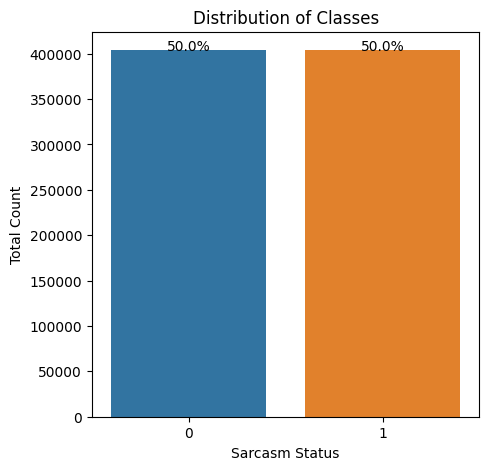

In [41]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= df5)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

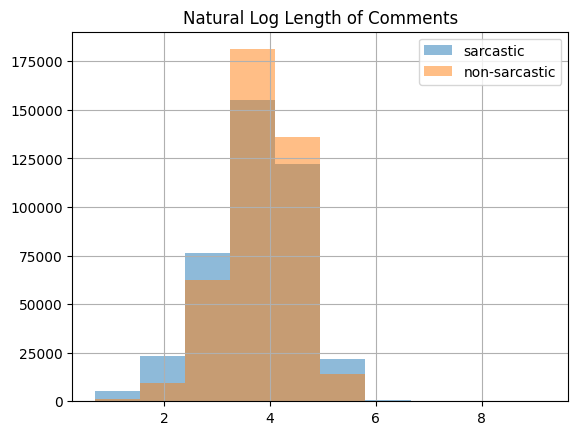

In [42]:
# To check if there is any relation between the length of the comment and its label
#train_df.loc[train_df,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic,alpha=.5)
df5.loc[df5['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df5.loc[df5['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

/tmp/ipykernel_2197415/2449768073.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= False)


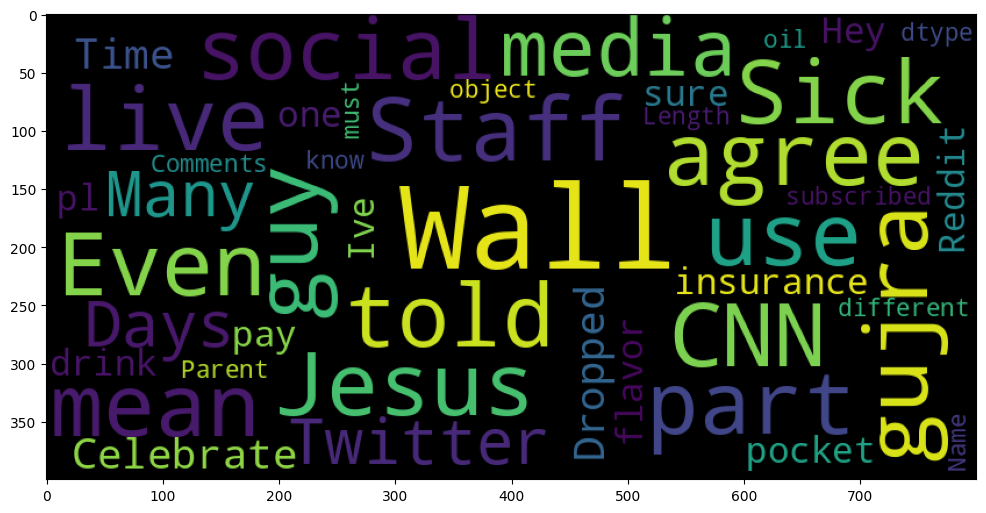

In [43]:
# Most common words in the sarcastic comments 
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(df5.loc[df5['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);

In [44]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(df5.loc[df5['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(df5.loc[df5['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((df5.loc[df5['label'] == 1]['Comments'].str.len())/(df5.loc[df5['label'] == 1]['Parent Comments'].str.len()))

In [45]:
d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

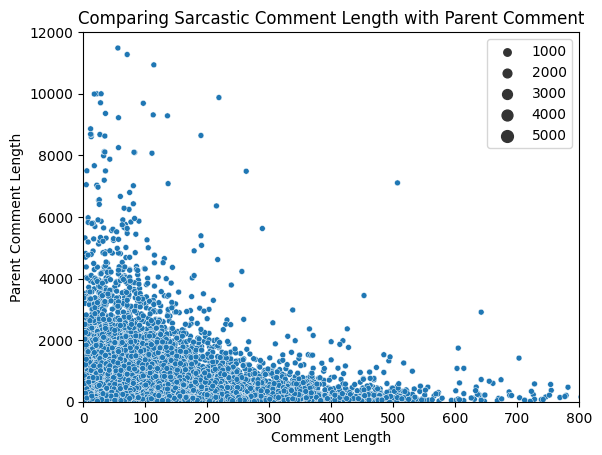

In [46]:
ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

In [47]:
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TreebankWordTokenizer, TweetTokenizer, MWETokenizer
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
corpus = df5['Comments'].values.astype('U')

In [49]:
corpus

array(['Central Illinois',
       'To think - CNN used to be the acronym synonymous with news.',
       "But then again; you have to consider that all husbands suspecting adultery don't or are simply can't afford to go for a paternity test.",
       ..., 'Essentially GAP insurance right?',
       "Yeah; but sometimes that weird kid keeps trying to show you his dick and implying he's a great guy if you gave him a shot.",
       "Petroleum doesn't really require a terroir like food products do"],
      dtype='<U10000')

Tfidf vectorizer

Stop words removed

In [50]:
"""Tfidf vectorizer

Stop words removed
"""

method="Binary"

from sklearn.feature_extraction.text import CountVectorizer

if method=="Tfidf":
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
elif method=="Binary":
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
    
tfidf= TfidfVectorizer(stop_words='english', ngram_range=(1,1))

X = vectorizer.fit_transform(corpus)
np.shape(X)

(808031, 384780)

In [51]:
labels = df5['label'].to_list()

In [52]:
#print(vectorizer.get_feature_names())
#X=np.asmatrix(X)
Countvecs=pd.DataFrame(X)

#print(Countvecs.head())

In [53]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1).build_analyzer()

In [54]:
Countvecs

,0
0,"(0, 49828)\t1\n (0, 156114)\t1\n (0, 49846..."
1,"(0, 330825)\t1\n (0, 57694)\t1\n (0, 35175..."
2,"(0, 63429)\t1\n (0, 154401)\t1\n (0, 32138..."
3,"(0, 346880)\t1"
4,"(0, 354206)\t1"
...,...
808026,"(0, 87340)\t1\n (0, 223235)\t1\n (0, 4918)..."
808027,"(0, 206168)\t1\n (0, 283433)\t1"
808028,"(0, 279964)\t1\n (0, 160291)\t1\n (0, 1218..."
808029,"(0, 378107)\t1\n (0, 137981)\t1\n (0, 1346..."


In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Countvecs[:,0], labels , test_size= 0.25, random_state=42)

InvalidIndexError: (slice(None, None, None), 0)

In [56]:
from os import path
sns.set()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import calendar
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline
import time

In [57]:
parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(random_state= 42)

logit_classifier = GridSearchCV(logit, parameters, cv = 5, n_jobs= 4)

# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('vectorizer', vectorizer),  ('logit_classifier', logit_classifier)])

In [58]:
start = time.time()
tfidf_logit_pipeline.fit(x_train, y_train)
end = time.time()
print(end - start) 

AttributeError: lower not found

In [ ]:
print(logit_classifier.best_params_)
print(logit_classifier.best_score_)

{'solver': 'liblinear', 'verbose': 0}
0.6778950580357586


In [ ]:
valid_pred = tfidf_logit_pipeline.predict(x_test)

In [ ]:
accuracy_score(y_test, valid_pred)

0.6789632093778464

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(valid_pred, y_test)
pre = precision_score(valid_pred, y_test)
rec = recall_score(valid_pred, y_test)
f1 = f1_score(valid_pred, y_test)

print ('Model Performance Statistic Suite-1: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)

cm = confusion_matrix(y_test,valid_pred)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

Model Performance Statistic Suite-1: 
Accuracy:  0.6789632093778464
Precision:  0.732384461480557
Recall:  0.6615284139707988
F1 Score:  0.6951555434384079
Sensitivity :  0.7005607766645979
Specificity :  0.6615284139707988


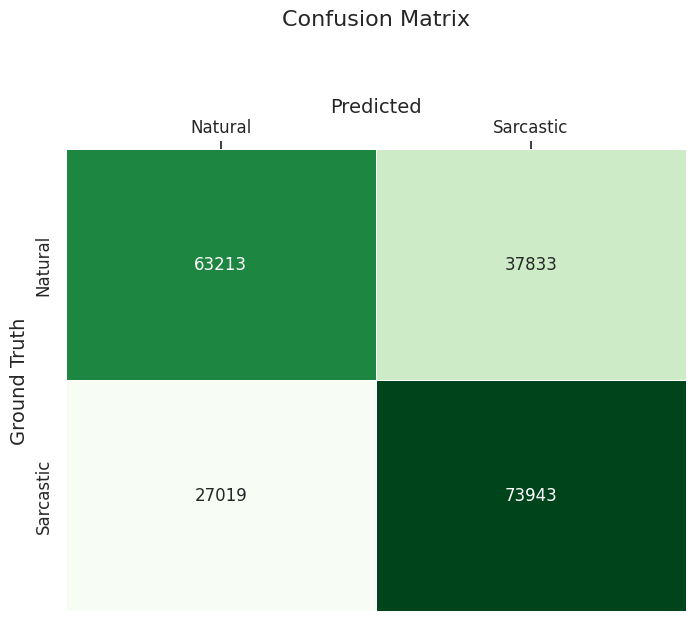

In [ ]:
cm =  pd.DataFrame(cm, index=['Natural','Sarcastic'],columns=['Natural','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Ground Truth',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
!deactivate

/bin/bash: line 1: deactivate: command not found
